# Banana CNN

importing all needed files

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

2022-05-06 10:13:36.232116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-06 10:13:36.232145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Creating a datagenerator for importing the pictures from the directory

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'Bananas/train',
    target_size=(96, 96),
    batch_size=32,
    seed=1,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    'Bananas/train', # same directory as training data
    target_size=(96, 96),
    batch_size=32,
    seed=1,
    class_mode='sparse',
    subset='validation') # set as validation data


images, labels = train_generator.next()
# labels
# images



Found 726 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Assigning class names

In [3]:
class_names = ['Brown', 'Green', 'Yellow']

Testing to make sure images are loaded correctly with the right labels

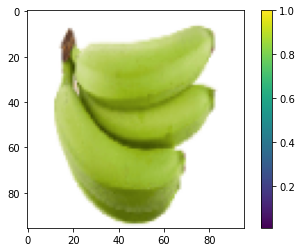

In [4]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

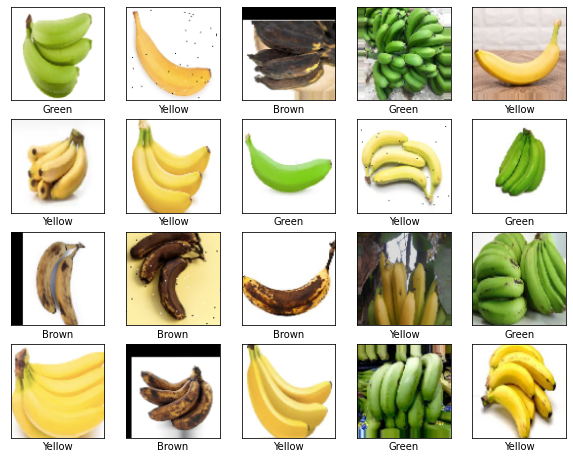

In [5]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i])])
plt.show()

Creating the model

In [6]:
# model = tf.keras.Sequential([

#     tf.keras.layers.Flatten(input_shape=(256, 256,3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(3)
# ])



from tensorflow.keras import datasets, layers, models
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(3, activation='Softmax'))

num_classes = 3
img_height = 96
img_width = 96
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 6, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.6),
  layers.Conv2D(64, 6, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 6, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

2022-05-06 10:13:39.045043: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-06 10:13:39.045071: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-06 10:13:39.045089: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (csctcloud): /proc/driver/nvidia/version does not exist
2022-05-06 10:13:39.045301: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compiling and fitting the model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_generator, epochs=100, validation_data = validation_generator)
# ,steps_per_epoch = 5,validation_steps = 5

2022-05-06 10:13:39.462324: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
23/23 [==============================] - 10s 403ms/step - loss: 1.0617 - accuracy: 0.3815 - val_loss: 1.0975 - val_accuracy: 0.3722
Epoch 2/100
23/23 [==============================] - 7s 315ms/step - loss: 1.0499 - accuracy: 0.4532 - val_loss: 1.0612 - val_accuracy: 0.3778
Epoch 3/100
23/23 [==============================] - 7s 311ms/step - loss: 0.8557 - accuracy: 0.6350 - val_loss: 1.0160 - val_accuracy: 0.3667
Epoch 4/100
23/23 [==============================] - 7s 308ms/step - loss: 0.5757 - accuracy: 0.7645 - val_loss: 0.8947 - val_accuracy: 0.6389
Epoch 5/100
23/23 [==============================] - 7s 304ms/step - loss: 0.4756 - accuracy: 0.8003 - val_loss: 0.7126 - val_accuracy: 0.6444
Epoch 6/100
23/23 [==============================] - 7s 309ms/step - loss: 0.4119 - accuracy: 0.8333 - val_loss: 0.7321 - val_accuracy: 0.6444
Epoch 7/100
23/23 [==============================] - 7s 314ms/step - loss: 0.3807 - accuracy: 0.8457 - val_loss: 0.7198 - val_accuracy: 0.666

Epoch 58/100
23/23 [==============================] - 7s 307ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.4134 - val_accuracy: 0.8944
Epoch 59/100
23/23 [==============================] - 7s 307ms/step - loss: 0.0264 - accuracy: 0.9890 - val_loss: 0.3549 - val_accuracy: 0.9000
Epoch 60/100
23/23 [==============================] - 7s 292ms/step - loss: 0.0147 - accuracy: 0.9945 - val_loss: 0.3037 - val_accuracy: 0.9278
Epoch 61/100
23/23 [==============================] - 7s 308ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.2972 - val_accuracy: 0.9222
Epoch 62/100
23/23 [==============================] - 7s 301ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.2794 - val_accuracy: 0.9444
Epoch 63/100
23/23 [==============================] - 7s 307ms/step - loss: 0.0233 - accuracy: 0.9890 - val_loss: 0.5711 - val_accuracy: 0.8667
Epoch 64/100
23/23 [==============================] - 7s 312ms/step - loss: 0.0703 - accuracy: 0.9725 - val_loss: 0.3254 - val_accuracy:

Plotting graphs of accuracy

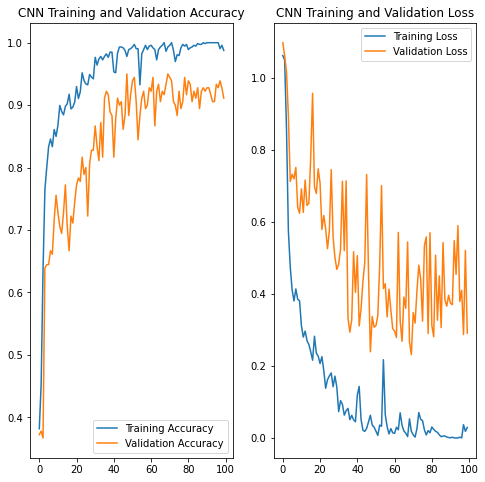

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Training and Validation Loss')
plt.show()

Making predictions on the model using images

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
                                        

In [11]:
images, labels = validation_generator.next()

predictions = probability_model.predict(images)

In [12]:
predictions[0]

array([9.993631e-01, 6.280825e-04, 8.816677e-06], dtype=float32)

In [13]:
print(np.argmax(predictions[0]))
print(class_names[int(np.argmax(predictions[0]))])

0
Brown


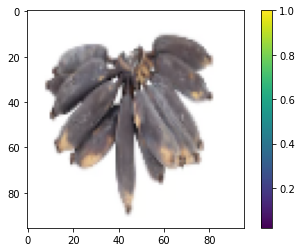

In [14]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

1
Green


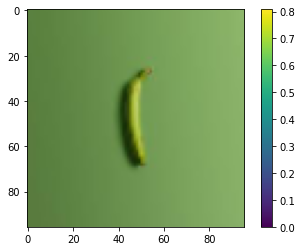

In [15]:
images, labels = validation_generator.next()

predictions = probability_model.predict(images)

print(np.argmax(predictions[0]))
print(class_names[int(np.argmax(predictions[0]))])

plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)


plt.show()

# EVALUATION

In [25]:
model.evaluate(validation_generator)

6/6 [==============================] - 1s 178ms/step - loss: 0.2614 - accuracy: 0.9056


[0.2613992691040039, 0.9055555462837219]

In [17]:
# model.save('bananaModel')

Imports image and makes prediction

In [18]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
Finalmodel = tf.keras.models.load_model('finalModel')
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

img = load_img('testImage/Unknown.jpeg', target_size=(96, 96))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)



predictions = Finalmodel.predict(img)
print(predictions)
print(class_names[int(np.argmax(predictions))])




[[-559.59735 -844.85535 1825.4697 ]]
Yellow


## Visualise Filters


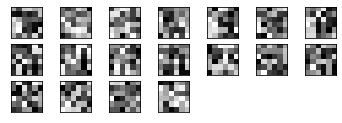

In [19]:
filters, layers = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 7, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Visualise Layers

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_input (InputLayer) [(None, 96, 96, 3)]       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
Total params: 3,488
Trainable params: 3,488
Non-trainable params: 0
_________________________________________________________________


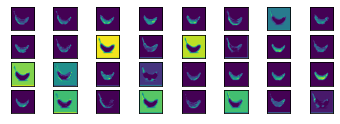

<Figure size 720x720 with 0 Axes>

In [20]:
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

model1 = Model(inputs=model.inputs, outputs=model.layers[2].output)
model1.summary()

# load the image with the required shape
img = load_img('testImage/Unknown.jpeg', target_size=(96, 96))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model1.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.figure(figsize=(10, 10))
plt.show()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_input (InputLayer) [(None, 96, 96, 3)]       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0   

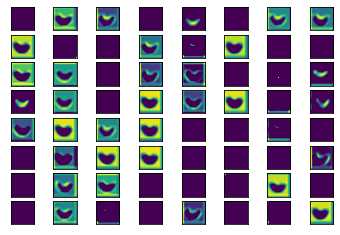

<Figure size 720x720 with 0 Axes>

In [21]:
model2 = Model(inputs=model.inputs, outputs=model.layers[6].output)
model2.summary()

# load the image with the required shape
img = load_img('testImage/Unknown.jpeg', target_size=(96, 96))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model2.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.figure(figsize=(10, 10))
plt.show()

In [22]:
images, labels = validation_generator.next()
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(images)
y_pred = np.argmax(y_pred1, axis=1)
print(labels)
print(y_pred)
# Print f1, precision, and recall scores
print(precision_score(labels, y_pred , average="macro"))
print(recall_score(labels, y_pred , average="macro"))
print(f1_score(labels, y_pred , average="macro"))

[1. 0. 0. 1. 2. 1. 0. 0. 2. 1. 2. 1. 1. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 2.
 2. 2. 2. 2. 2. 1. 1. 0.]
[1 0 0 1 2 1 0 0 2 1 2 1 1 0 1 0 0 0 0 2 0 1 0 0 1 2 2 1 1 1 1 0]
0.8974358974358975
0.8666666666666667
0.8598550724637682


In [23]:
# model.save('finalModel')


# Finalmodel = tf.keras.models.load_model('finalModel')


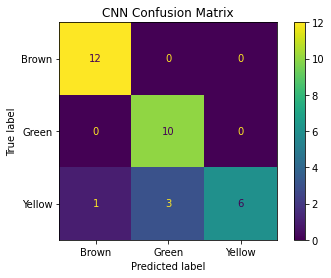

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot()
plt.title('CNN Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
finalModel = tf.keras.models.load_model('finalANNModel')

finalModel.evaluate(validation_generator)